# To prevent scroll bars in Jupyter Notebook

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Import Necessary Libraries

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.cross_validation import cross_val_score
from sklearn.feature_selection import SelectKBest

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score

import os
from __future__ import print_function

from scipy import stats
from sklearn.model_selection import GridSearchCV


import math


C:\Users\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Change this datapath to YOUR respective folder

os.chdir("C:\\Users\\Pranay\\Desktop\\Python a-z\\Neural Nets")

In [4]:
#Reading the data

data = pd.read_csv("adult_Sai.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


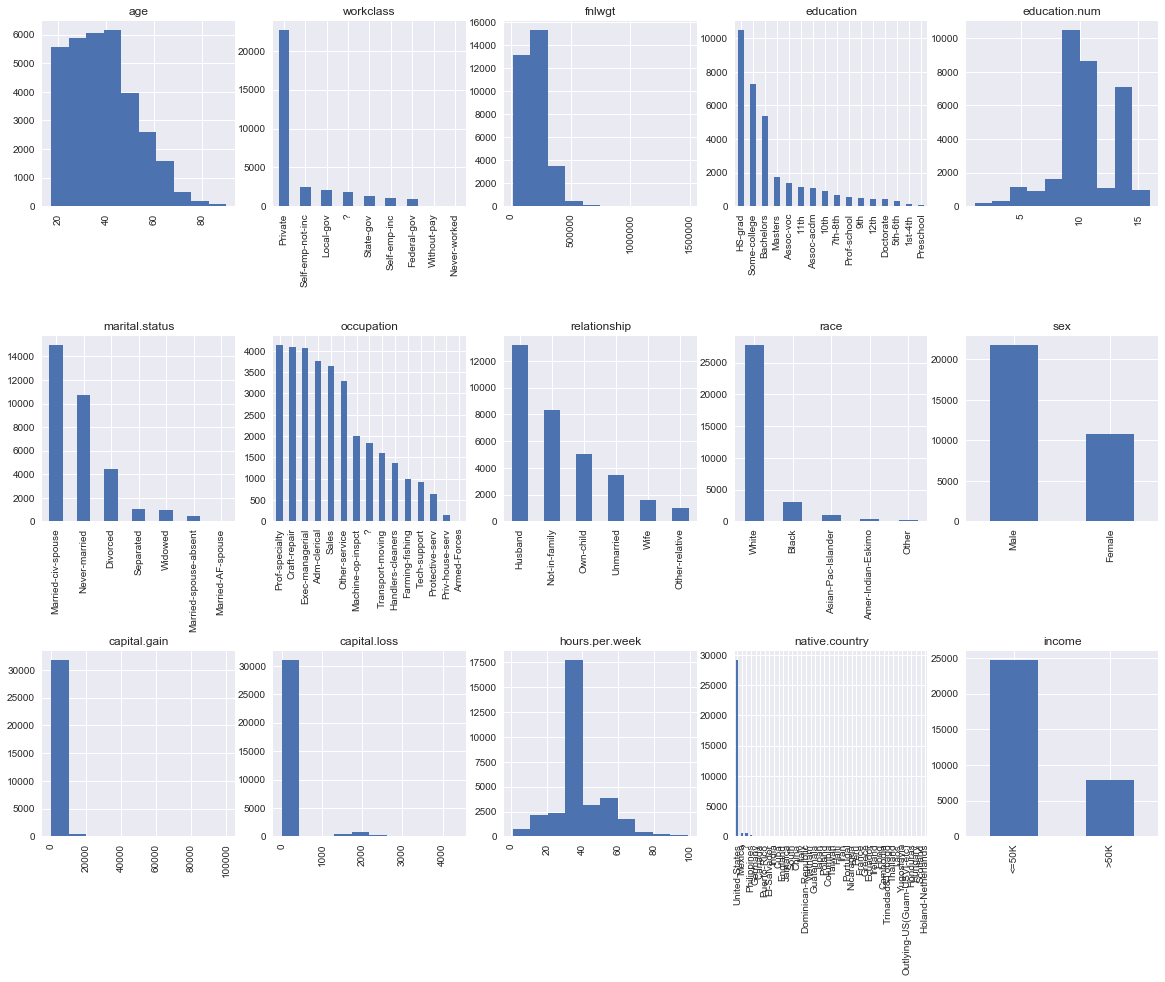

In [7]:
#Some basic EDA

fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()


In [74]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


native.country
583
1.79%




In [75]:
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native.country"] != "?"]

data.shape

(30162, 15)

In [76]:
#Checking the statistical numbers
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# frequency for categorical fields 

category_col =['workclass', 'race', 'education','marital.status', 'occupation',
               'relationship', 'sex', 'native.country', 'income'] 
for c in category_col:
    print (c)
    print (data[c].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                  

In [9]:
data["income"].value_counts()[0]*1.0 / data.shape[0]

0.75919044255397561

In [10]:
data["income"].value_counts()[1]*1.0 / data.shape[0]

0.24080955744602439

In [11]:
for col in category_col:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [12]:
col_names = data.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "income":
        if len(data[c].unique()) <= 2:
            corr = stats.pearsonr(data['income'],data[c])[0]
        else:
            corr = stats.pointbiserialr(data['income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,abs_corr,correlation
parameter,,
education.num,0.335154,0.335154
relationship,0.250918,-0.250918
age,0.234037,0.234037
hours.per.week,0.229689,0.229689
capital.gain,0.223329,0.223329
sex,0.215980,0.215980
marital.status,0.199307,-0.199307
capital.loss,0.150526,0.150526
education,0.079317,0.079317


In [13]:
#Define X (Independent Variables) & Y Dependent Variable
X = data.drop('income',axis=1)
y = data['income']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


In [ ]:
#Grid search to determine the best parameters
#For more information about Grid search please refer to the following link:
#https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

In [20]:
hidden_layer_sizes = [1, 5, 10, 15, 20, 25, 30,40]
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes)
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)

In [21]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851147 using {'hidden_layer_sizes': 30}
0.826085 (0.012754) with: {'hidden_layer_sizes': 1}
0.847011 (0.005708) with: {'hidden_layer_sizes': 5}
0.850000 (0.008010) with: {'hidden_layer_sizes': 10}
0.849140 (0.006257) with: {'hidden_layer_sizes': 15}
0.849795 (0.005856) with: {'hidden_layer_sizes': 20}
0.849672 (0.005763) with: {'hidden_layer_sizes': 25}
0.851147 (0.004210) with: {'hidden_layer_sizes': 30}
0.850532 (0.004205) with: {'hidden_layer_sizes': 40}


In [92]:
activation = ["identity", "logistic", "tanh", "relu"]
param_grid = dict(activation = activation)
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)

In [93]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.843685 using {'activation': 'tanh'}
0.818001 (0.005461) with: {'activation': 'identity'}
0.842403 (0.004710) with: {'activation': 'logistic'}
0.843685 (0.006170) with: {'activation': 'tanh'}
0.840149 (0.004843) with: {'activation': 'relu'}


In [94]:
solver = ["lbfgs", "sgd", "adam"]
param_grid = dict(solver = solver)
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)

In [95]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.840767 using {'solver': 'adam'}
0.834313 (0.002149) with: {'solver': 'lbfgs'}
0.838557 (0.003539) with: {'solver': 'sgd'}
0.840767 (0.003509) with: {'solver': 'adam'}


In [96]:
max_iter = [100, 200, 300, 400, 500, 600, 700,800]
param_grid = dict(max_iter = max_iter)
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1) 
grid_result = grid.fit(X_train, y_train)

In [97]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842226 using {'max_iter': 400}
0.841696 (0.003932) with: {'max_iter': 100}
0.840812 (0.005525) with: {'max_iter': 200}
0.837540 (0.003064) with: {'max_iter': 300}
0.842226 (0.004122) with: {'max_iter': 400}
0.839883 (0.004450) with: {'max_iter': 500}
0.840414 (0.006130) with: {'max_iter': 600}
0.839662 (0.005733) with: {'max_iter': 700}
0.840635 (0.005424) with: {'max_iter': 800}


In [22]:
#Using the best parameters from Grid Search to create the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='tanh',hidden_layer_sizes=(30,30,30),max_iter=400, solver ='adam')

In [24]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [25]:
predictions = mlp.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[5698  451]
 [ 816 1176]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6149
          1       0.72      0.59      0.65      1992

avg / total       0.84      0.84      0.84      8141



In [27]:
#Getting the weights ( there will be 3 layers with 30 coefficients)
mlp.coefs_[0]

array([[  6.62585063e-02,  -4.21907873e-01,   1.60151748e-01,
          1.15599684e-01,   1.38823199e-01,   3.91346442e-01,
         -2.41480660e-02,  -5.20972731e-01,   4.34429141e-01,
          3.14221511e-01,   6.54251796e-02,  -6.44441523e-02,
          3.28323518e-01,   5.88444045e-01,   7.54690952e-01,
         -1.46434878e-03,  -2.02742813e-03,   2.45452854e-01,
          1.08163038e-01,  -9.34391377e-01,   7.13965132e-01,
          2.96132854e-01,   1.58331954e-01,   2.57943044e-01,
         -7.98729670e-03,  -2.97014033e-02,   2.63009317e-01,
         -2.05559189e-01,  -8.81305389e-01,   1.24965981e-01],
       [ -7.45585194e-02,  -6.51477317e-02,   2.22584219e-01,
          4.68948917e-01,   9.13090721e-02,   1.73959694e-01,
          5.66441297e-02,  -2.70672659e-01,  -2.64707518e-01,
         -5.99132273e-01,  -4.13099456e-01,  -7.34093545e-01,
          1.73278576e-01,   3.22301895e-01,   3.80170932e-01,
         -2.67521848e-01,   3.39106899e-01,   9.33595299e-02,
       

In [28]:
#Let me know if you have any queries- Mail me at pranaystb@gmail.com